In [1]:
from keras.layers import Dense, BatchNormalization
from keras.layers import Dropout, GaussianNoise
from keras.layers import LayerNormalization
from keras.models import Sequential
from keras.optimizers import Adam
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [16]:
from sklearn.datasets import load_iris
data = load_iris()
print(list(data.target_names))
y = data.target
X = data.data
y

['setosa', 'versicolor', 'virginica']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
y = pd.Categorical(y)

In [7]:
y.shape

(150,)

In [26]:
y_one_hot = pd.get_dummies(y).values
class_num = y_one_hot.shape[1]
class_num

3

In [12]:
y_one_hot[:10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [11]:
y_one_hot.shape

(150, 3)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y_one_hot, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
(X_train.shape[1],)

(4,)

In [20]:
X_train.shape

(120, 4)

In [21]:
num_ner = 10

model = Sequential()
model.add(Dense(num_ner,input_shape = (X.shape[1],), activation="relu"))
model.add(Dense(num_ner-4, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [22]:
model.compile(optimizer=Adam(0.003),
              loss="categorical_crossentropy",
              metrics=('accuracy'))

num_epochs = 500
model.fit(X_train, y_train, batch_size=32, epochs=num_epochs, validation_data=(X_test, y_test))

model.summary()

Epoch 1/500
4/4 [==============================] - 1s 85ms/step - loss: 1.1530 - accuracy: 0.3000 - val_loss: 1.0116 - val_accuracy: 0.3333
Epoch 2/500
4/4 [==============================] - 0s 12ms/step - loss: 1.0423 - accuracy: 0.4250 - val_loss: 0.9277 - val_accuracy: 0.4667
Epoch 3/500
4/4 [==============================] - 0s 12ms/step - loss: 0.9538 - accuracy: 0.5167 - val_loss: 0.8599 - val_accuracy: 0.5333
Epoch 4/500
4/4 [==============================] - 0s 13ms/step - loss: 0.8625 - accuracy: 0.5833 - val_loss: 0.8024 - val_accuracy: 0.5667
Epoch 5/500
4/4 [==============================] - 0s 11ms/step - loss: 0.7947 - accuracy: 0.6250 - val_loss: 0.7541 - val_accuracy: 0.5667
Epoch 6/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7366 - accuracy: 0.6500 - val_loss: 0.7145 - val_accuracy: 0.6000
Epoch 7/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6928 - accuracy: 0.6667 - val_loss: 0.6822 - val_accuracy: 0.6000
Epoch 8/500
4/4 [===

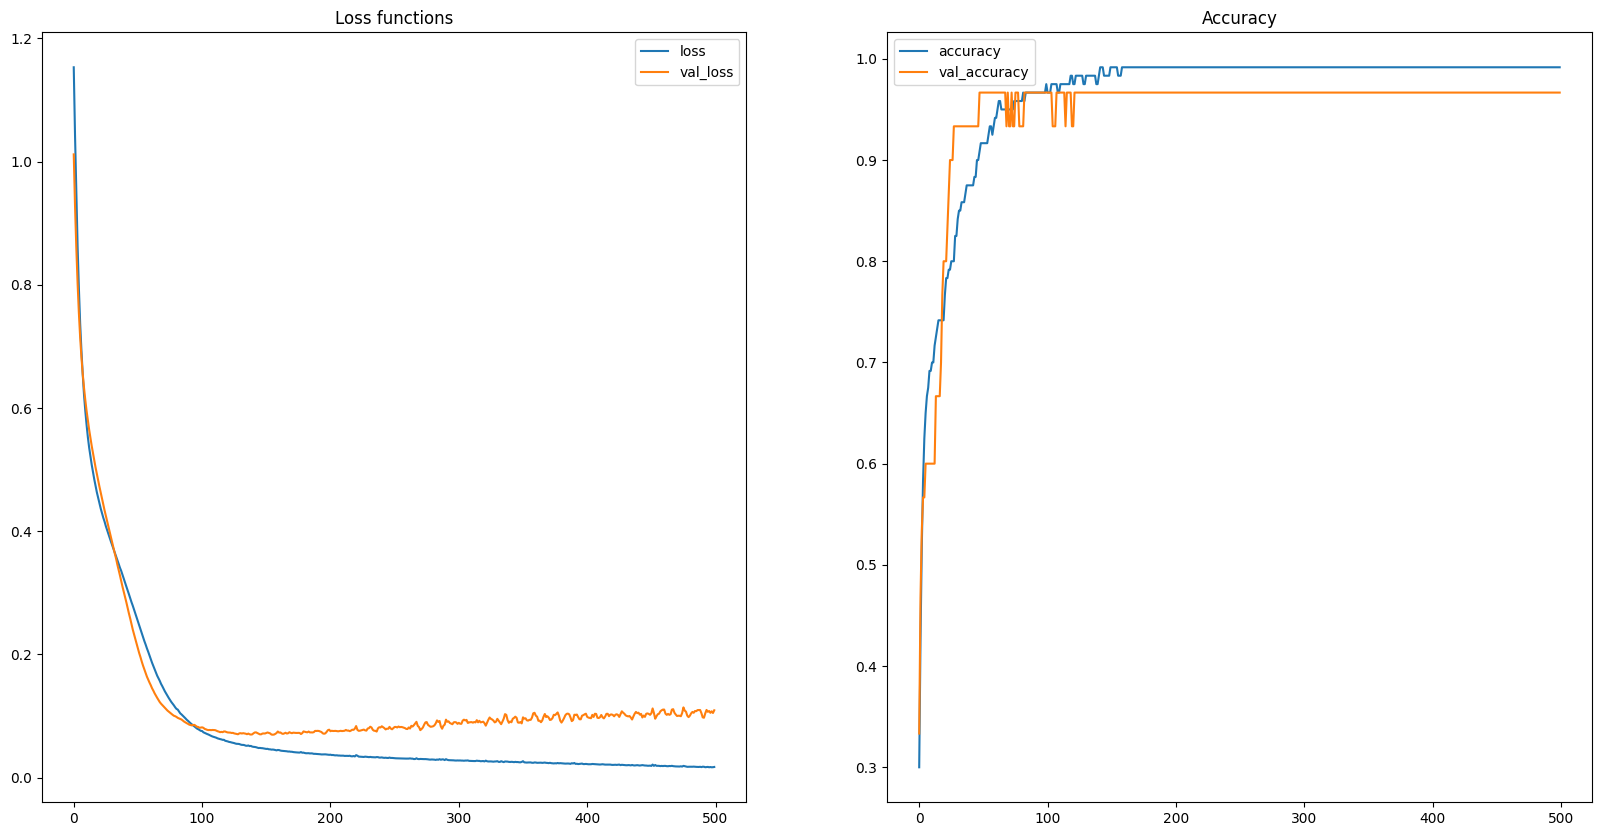

In [23]:
history = model.history.history

epochs = np.arange(0,num_epochs)

fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].plot(epochs, history['loss'], label='loss')
ax[0].plot(epochs, history['val_loss'], label='val_loss')
ax[0].set_title('Loss functions')
ax[0].legend()

ax[1].plot(epochs, history['accuracy'], label='accuracy')
ax[1].plot(epochs, history['val_accuracy'], label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()